In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from numpy import mean
from sklearn.model_selection import train_test_split
# Support functions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json ('customer_data.json').transpose()
df.shape

(10000, 15)

In [3]:
df.head()

,id,name,credit_rating,country,gender,age,tenure,balance,number_products,credit_card,is_active,estimated_salary,exited,longitude,latitude
1,15634602,Hargrave,619,France,Female,110,2,0.0,1,1,1,101348.88,1,103.9,13.96
2,15647311,Hill,608,Spain,Female,38,1,83807.86,1,0,1,112542.58,0,94.02,27.62
3,15619304,Onio,502,France,Female,54,8,159660.8,3,1,0,113931.57,1,-117.43,-1.2
4,15701354,Boni,699,France,Female,0,1,0.0,2,0,0,93826.63,0,-81.99,55.05
5,15737888,Mitchell,850,Spain,Female,54,2,125510.82,1,1,1,79084.1,0,66.56,-13.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  object
 1   name              10000 non-null  object
 2   credit_rating     10000 non-null  object
 3   country           10000 non-null  object
 4   gender            10000 non-null  object
 5   age               10000 non-null  object
 6   tenure            10000 non-null  object
 7   balance           10000 non-null  object
 8   number_products   10000 non-null  object
 9   credit_card       10000 non-null  object
 10  is_active         10000 non-null  object
 11  estimated_salary  10000 non-null  object
 12  exited            10000 non-null  object
 13  longitude         10000 non-null  object
 14  latitude          10000 non-null  object
dtypes: object(15)
memory usage: 1.5+ MB


In [5]:
#Exited customers
df_exited_customers = df[df["exited"]==1]
#df_exited_customers(columns=["Balance"])

In [6]:
df_exited_customers
#why the exited customers still have balance in account? What is the authencity for the balance data? How old is the data.
#what is the product data?
#freq of transaction would provide better input than the balance

,id,name,credit_rating,country,gender,age,tenure,balance,number_products,credit_card,is_active,estimated_salary,exited,longitude,latitude
1,15634602,Hargrave,619,France,Female,110,2,0.0,1,1,1,101348.88,1,103.9,13.96
3,15619304,Onio,502,France,Female,54,8,159660.8,3,1,0,113931.57,1,-117.43,-1.2
6,15574012,Chu,645,Spain,Male,35,8,113755.78,2,1,0,149756.71,1,23.12,-13.67
8,15656148,Obinna,376,Germany,Female,127,4,115046.74,4,1,0,119346.88,1,-83.17,-6.92
17,15737452,Romeo,653,Germany,Male,12,1,132602.88,1,1,0,5097.67,1,33.08,52.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,85,3,152039.7,1,1,1,53445.17,1,-103.86,-68.03
9983,15768163,Griffin,655,Germany,Female,132,7,137145.12,1,1,0,115146.4,1,40.99,-72.07
9992,15769959,Ajuluchukwu,597,France,Female,65,4,88381.21,1,1,0,69384.71,1,-46.85,20.1
9998,15584532,Liu,709,France,Female,39,7,0.0,1,0,1,42085.58,1,36.47,-26.94


In [7]:
df["number_products"].nunique() # which product. No of products or any specific number to a product

4

In [8]:
df['age']= df['age'].astype(int)
df['age'].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.70,0.85,0.9,0.99])  # min is 0 and max is 149 is not correct data..

count    10000.000000
mean        74.413600
std         43.502708
min          0.000000
1%           1.000000
5%           7.000000
10%         14.000000
25%         37.000000
50%         74.000000
70%        105.000000
85%        128.000000
90%        135.000000
99%        148.000000
max        149.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Density'>

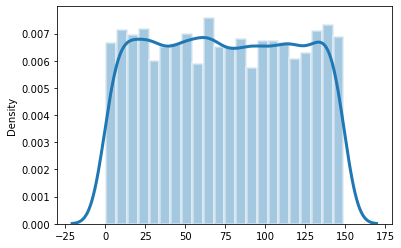

In [9]:
sns.distplot(df[['age']], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

In [10]:
df = df[(df['age'] >= 18) &(df['age'] <= 90)] # legal age dataframe

In [11]:
df.shape

(4846, 15)

In [12]:
#not giving any relevant input
df.drop(["id","name","longitude","latitude"],axis=1,inplace=True)

In [13]:
df.head()

,credit_rating,country,gender,age,tenure,balance,number_products,credit_card,is_active,estimated_salary,exited
2,608,Spain,Female,38,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,54,8,159660.8,3,1,0,113931.57,1
5,850,Spain,Female,54,2,125510.82,1,1,1,79084.1,0
6,645,Spain,Male,35,8,113755.78,2,1,0,149756.71,1
11,528,France,Male,49,6,102016.72,2,0,0,80181.12,0


In [14]:
df['age'].describe()

count    4846.000000
mean       53.835328
std        20.959052
min        18.000000
25%        36.000000
50%        54.000000
75%        71.000000
max        90.000000
Name: age, dtype: float64

In [15]:
#Check Gender related statistics
print(df["gender"].value_counts())
df["gender"] = df["gender"].astype('category')
print(df["gender"].describe())

Male      2673
Female    2173
Name: gender, dtype: int64
count     4846
unique       2
top       Male
freq      2673
Name: gender, dtype: object


In [16]:
print(df["country"].value_counts())

France     2433
Spain      1210
Germany    1203
Name: country, dtype: int64


In [17]:
#converting some columns to int to check the statistial inference
df[["age","tenure","credit_rating"]] = df[["age","tenure","credit_rating"]].astype(str).astype(int)
df[["estimated_salary","balance"]] = df[["estimated_salary","balance"]].astype(str).astype(float)

In [18]:
df.describe()

,credit_rating,age,tenure,balance,estimated_salary
count,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000
mean,650.048906,53.835328,5.012794,77033.966946,100079.144519
std,95.929732,20.959052,2.897464,62040.196664,57476.086635
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,36.000000,2.000000,0.000000,50578.670000
50%,651.000000,54.000000,5.000000,97729.660000,100783.160000
75%,718.000000,71.000000,7.000000,127443.050000,148809.445000
max,850.000000,90.000000,10.000000,238387.560000,199953.330000


In [19]:
df[(df['estimated_salary'] == df['estimated_salary'].min())]

,credit_rating,country,gender,age,tenure,balance,number_products,credit_card,is_active,estimated_salary,exited
2363,709,Germany,Male,57,4,122917.71,1,1,1,11.58,1


#### Solution Step 1:-
<b>Age:</b> The age of the customers start from 0 and has maximum of 150. Which is not very logical. So only the lowest Legal age to open bank account ie. 18 years to Average life expectancy 90 years has been considered.

<b>gender:</b> The Gender wise population is equally divided. And the accounts owned by Male are slightly more.

<b>country:</b> Maximum customers are from France (50%) and 25% each from Spain ang Germany.

<b>estimated_salary:</b> The minimum salary for one entry is as low as 11.58 Which sounds like a wrong entry (outlier).

<b>number_products:</b> A breakdown of the product or more information on this column can be more insightful.

<b>Customer Data :</b> There are customers who have exited but still have a balance in their account.


In [20]:
df["exited"].value_counts()  #Imbalanced data

0    3844
1    1002
Name: exited, dtype: int64

In [21]:
#churn rate
df["exited"].mean() #20.7%

0.20676846884028063

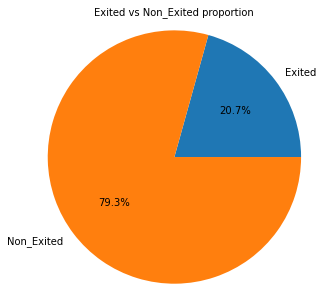

In [22]:
labels = "Exited","Non_Exited"
sizes = [df.exited[df["exited"]==1].count(), df.exited[df["exited"]==0].count()]
fig,ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title("Exited vs Non_Exited proportion", size = 10)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 2 to 10000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_rating     4846 non-null   int32   
 1   country           4846 non-null   object  
 2   gender            4846 non-null   category
 3   age               4846 non-null   int32   
 4   tenure            4846 non-null   int32   
 5   balance           4846 non-null   float64 
 6   number_products   4846 non-null   object  
 7   credit_card       4846 non-null   object  
 8   is_active         4846 non-null   object  
 9   estimated_salary  4846 non-null   float64 
 10  exited            4846 non-null   object  
dtypes: category(1), float64(2), int32(3), object(5)
memory usage: 364.5+ KB


In [24]:
num_df=df.select_dtypes(include="number")
categor_df=df.select_dtypes(include=("object" or "category"))

In [25]:
categor_df.columns

Index(['country', 'number_products', 'credit_card', 'is_active', 'exited'], dtype='object')

In [26]:
num_df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.70,0.85,0.9,0.99])

,credit_rating,age,tenure,balance,estimated_salary
count,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000
mean,650.048906,53.835328,5.012794,77033.966946,100079.144519
std,95.929732,20.959052,2.897464,62040.196664,57476.086635
min,350.000000,18.000000,0.000000,0.000000,11.580000
1%,432.000000,18.000000,0.000000,0.000000,1711.884500
5%,490.250000,21.000000,1.000000,0.000000,10042.015000
10%,521.000000,25.000000,1.000000,0.000000,20370.065000
25%,584.000000,36.000000,2.000000,0.000000,50578.670000
50%,651.000000,54.000000,5.000000,97729.660000,100783.160000
70%,703.000000,68.000000,7.000000,122061.535000,138875.680000


<Figure size 432x288 with 0 Axes>

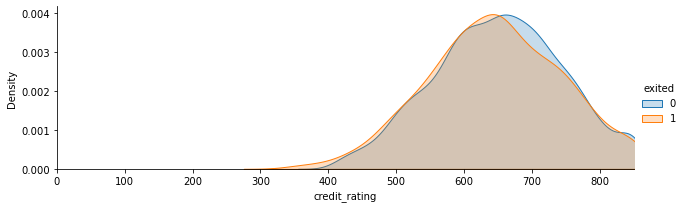

<Figure size 432x288 with 0 Axes>

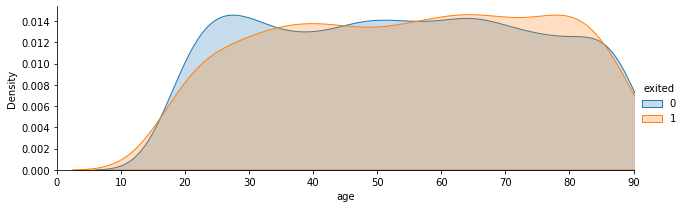

<Figure size 432x288 with 0 Axes>

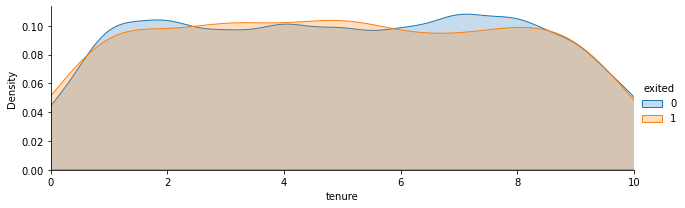

<Figure size 432x288 with 0 Axes>

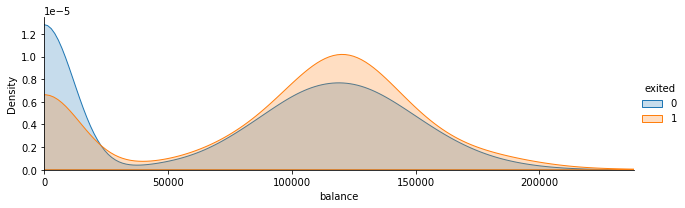

<Figure size 432x288 with 0 Axes>

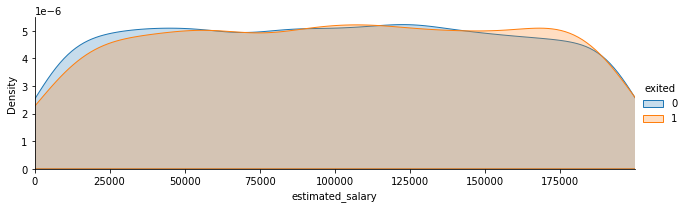

In [27]:
num_df['exited'] = df['exited']
for col in (num_df.columns[0:5]):
    plt.figure()
    facet = sns.FacetGrid(num_df, hue="exited",aspect=3)
    facet.map(sns.kdeplot,col,shade= True)
    facet.set(xlim=(0, df[col].max()))
    facet.add_legend()
plt.show()

#### Data Analysis on basis of given numerical features

1. There is no significant difference in the credit rating distribution between retained and churned customers.
2. The age has min limit of 0 and max limit of 150. Both these values are very extreme. As the children below age of 18 cannot have their account. So it might be some joint account with their guardian. For more than 95 age is a miss entry as this is a very extreme value.
3. Customers with tenure (below 1 year and 3-5 years) are having slightly more likely to churn compared to those that are of other tenure.
4. Customers with significant bank balances have a righer churn rate. Which in turn can have some adverse effect on the bank.
5. Estimated salary gives no valuabe input to the churn rate. But the minimum estimated salary value (11.58) is of concern to the data analysis.

In [28]:
df[df['exited'] == 1]["tenure"].value_counts()

5     110
1     109
3     107
8     102
9     101
4      98
6      94
7      93
2      92
0      49
10     47
Name: tenure, dtype: int64

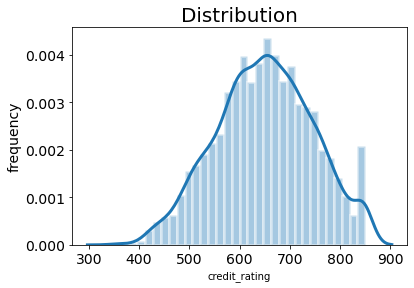

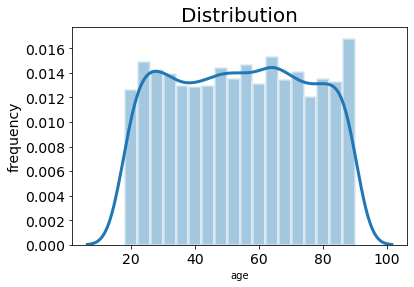

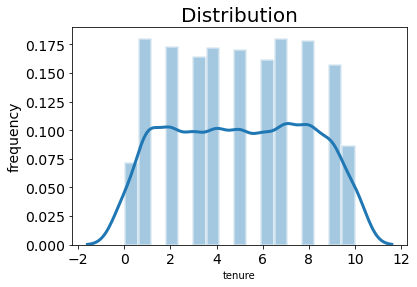

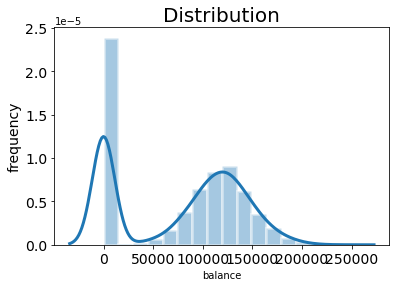

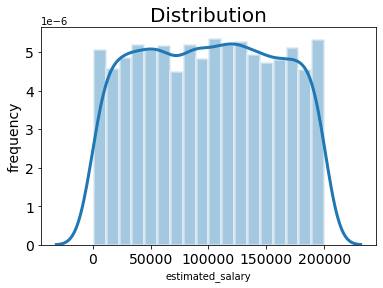

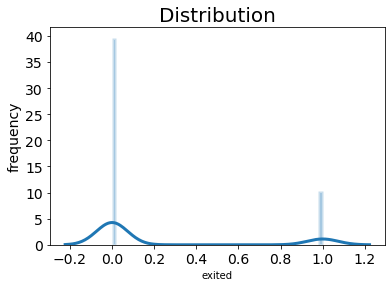

In [29]:
# histogram and kernel density estimation function for distribution understanding
for col in (num_df.columns):
    plt.figure()
    ax = sns.distplot(num_df[[col]], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
    ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col)
    plt.ylabel('frequency', fontsize=14)
    plt.title('Distribution', fontsize=20);
plt.show()

#### Data Analysis on basis of given numerical features

<b> 1. Credit Rating :</b> There is a normal distributaion for credit rating.

<b> 2. Age : </b> The age has a normal distributaion for credit rating.

<b> 3. Balance:</b> There are 2 peaks for the Balance. The 1st peak at 0 are probably for exited customers. The next peak is for retained customers.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 2 to 10000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_rating     4846 non-null   int32   
 1   country           4846 non-null   object  
 2   gender            4846 non-null   category
 3   age               4846 non-null   int32   
 4   tenure            4846 non-null   int32   
 5   balance           4846 non-null   float64 
 6   number_products   4846 non-null   object  
 7   credit_card       4846 non-null   object  
 8   is_active         4846 non-null   object  
 9   estimated_salary  4846 non-null   float64 
 10  exited            4846 non-null   object  
dtypes: category(1), float64(2), int32(3), object(5)
memory usage: 364.5+ KB


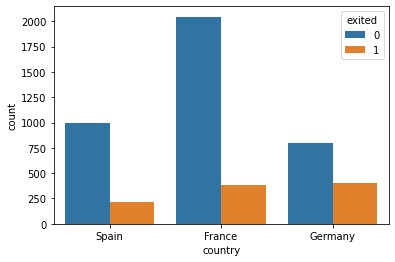

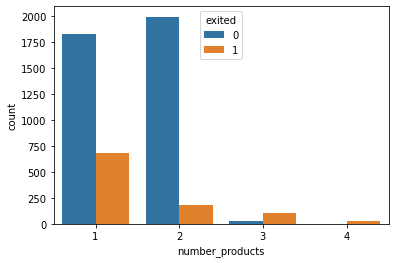

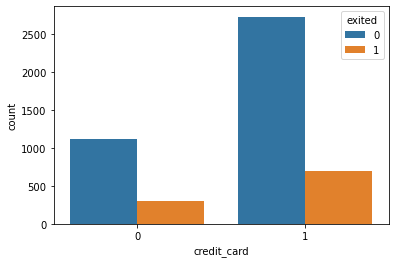

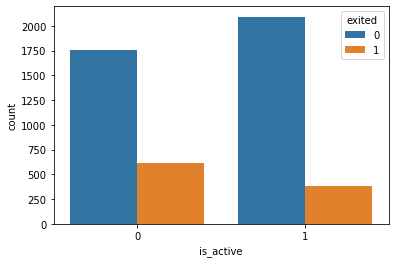

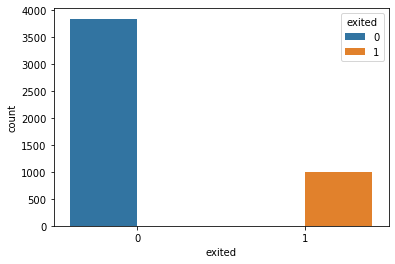

In [31]:
for col in (categor_df.columns):
    plt.figure()
    sns.countplot(x=col,hue = 'exited',data=df)
plt.show()

#### Data Analysis on basis of given categorical features

1. Largest churn rate is in Germany. Proportion of churned customers is with inversely related to the population of customers.
2. number_product 3 and 4 have very high churn rate or percentage.
3. Majority of the customers have a credit card. Customers without a Credit card have lower churn rate than those who have a credit card. Though this kind of observation can be a hypotheical scene. Or the bank has some poor services in Credit Card handling and so Churn is happening.
5. The number of inactive customers for the bank is alarming. And this is the portion of customers who churn at a very high rate.Monitoring is required in this field and promotion/offers can be decided to make inactive members as active members.


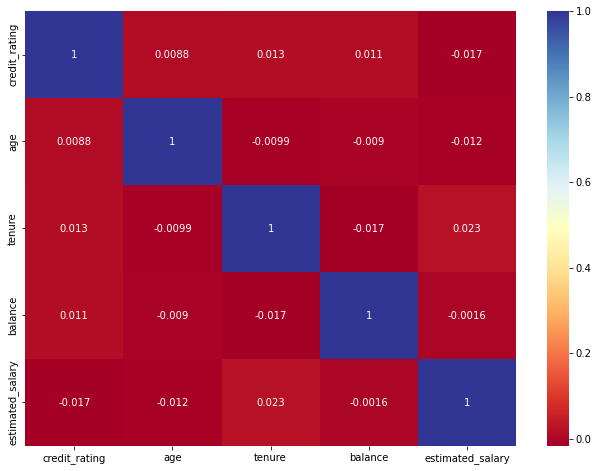

In [32]:
#correlation plot
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [33]:
#missing
df.isnull().mean()

credit_rating       0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
number_products     0.0
credit_card         0.0
is_active           0.0
estimated_salary    0.0
exited              0.0
dtype: float64

In [34]:
#Some extra features need to be created for understanding

In [35]:
df['CreditScore_Age'] = df.credit_rating/(df.age)
df['CreditScore_Salary'] = df.credit_rating/(df.estimated_salary)
df['Balance_Salary_Ratio']= df.balance/(df.estimated_salary)

<Figure size 432x288 with 0 Axes>

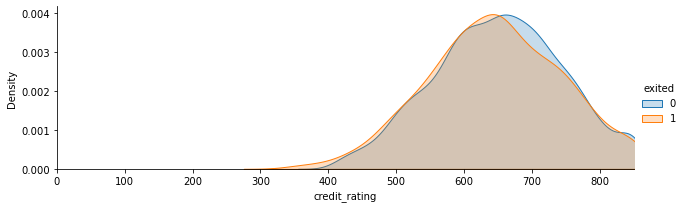

<Figure size 432x288 with 0 Axes>

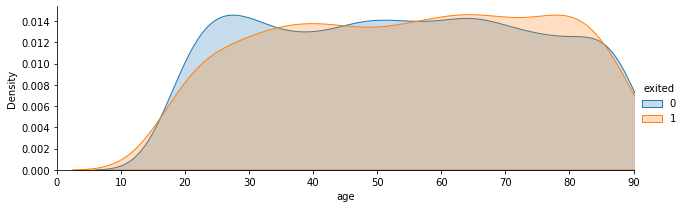

<Figure size 432x288 with 0 Axes>

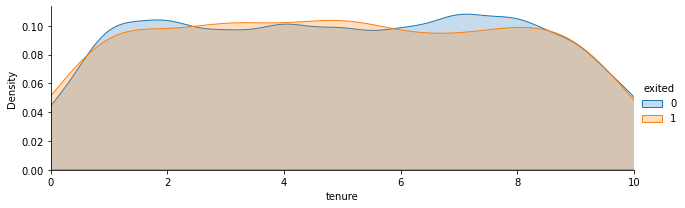

<Figure size 432x288 with 0 Axes>

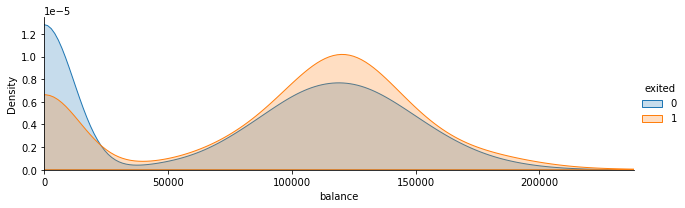

<Figure size 432x288 with 0 Axes>

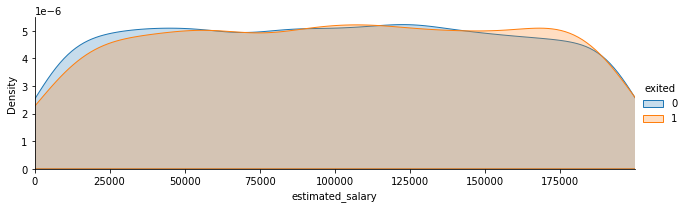

<Figure size 432x288 with 0 Axes>

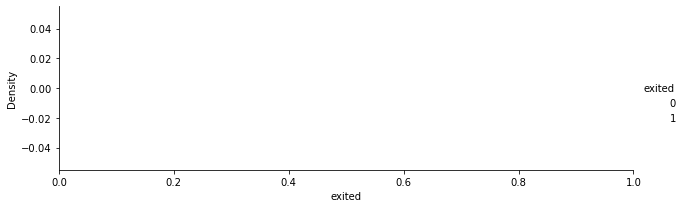

In [36]:
num_df['exited'] = df['exited']

for col in (num_df.columns):
    plt.figure()
    facet = sns.FacetGrid(num_df, hue="exited",aspect=3)
    facet.map(sns.kdeplot,col,shade= True)
    facet.set(xlim=(0, df[col].max()))
    facet.add_legend()
plt.show()

In [37]:
#converting some columns to int to check the modelling
df[["number_products","credit_card","is_active"]] = df[["number_products","credit_card","is_active"]].astype(str).astype(int)

In [38]:
df = df.drop(columns=['CreditScore_Age','CreditScore_Salary','Balance_Salary_Ratio'])
df.head()

,credit_rating,country,gender,age,tenure,balance,number_products,credit_card,is_active,estimated_salary,exited
2,608,Spain,Female,38,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,54,8,159660.80,3,1,0,113931.57,1
5,850,Spain,Female,54,2,125510.82,1,1,1,79084.10,0
6,645,Spain,Male,35,8,113755.78,2,1,0,149756.71,1
11,528,France,Male,49,6,102016.72,2,0,0,80181.12,0


In [39]:
#Encoding categorical variables
df["gender"] = df["gender"].replace(["Male", "Female"], [0,1])
df["country"] = df["country"].replace(["Spain", "France", "Germany"], [0,1,2])

### Step 2: Implement a model to forecast which customers are supposed to leave the bank
#### Model Implement

In [40]:
# Preparing for model traing
x = df.drop("exited", axis=1)
y = df["exited"]
y=y.astype('int')

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

to_scale_features = ["credit_rating", "age", "balance",'estimated_salary']

df_scaled = pd.DataFrame(data = x)
df_scaled[to_scale_features] = scaler.fit_transform(x[to_scale_features])
df_scaled = x

In [42]:
x.head()

,credit_rating,country,gender,age,tenure,balance,number_products,credit_card,is_active,estimated_salary
2,0.516,0,1,0.277778,1,0.351561,1,0,1,0.562819
3,0.304,1,1,0.500000,8,0.669753,3,1,0,0.569766
5,1.000,0,1,0.500000,2,0.526499,1,1,1,0.395478
6,0.590,0,0,0.236111,8,0.477188,2,1,0,0.748944
11,0.356,1,0,0.430556,6,0.427945,2,0,0,0.400964


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [44]:
print("Shape of Training Data",x_train.shape)
print("Shape of Testing Data",x_test.shape)
print("Churn Rate in Training Data",y_train.mean())
print("Churn Rate in Testing Data",y_test.mean())

Shape of Training Data (3876, 10)
Shape of Testing Data (970, 10)
Churn Rate in Training Data 0.20768833849329205
Churn Rate in Testing Data 0.20309278350515464


In [45]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg=LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)
print_score(logreg, x_train,y_train, x_test, y_test, train=True)
print_score(logreg, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 79.18%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.792809    0.400000  0.791796     0.596405      0.711227
recall        0.998046    0.004969  0.791796     0.501508      0.791796
f1-score      0.883667    0.009816  0.791796     0.446742      0.702179
support    3071.000000  805.000000  0.791796  3876.000000   3876.000000
_______________________________________________
Confusion Matrix: 
 [[3065    6]
 [ 801    4]]

Test Result:
Accuracy Score: 79.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.796698    0.0  0.795876    0.398349      0.634894
recall       0.998706    0.0  0.795876    0.499353      0.795876
f1-score     0.886338    0.0  0.795876    0.443169      0.706329
support    773.000000  197.0  0.795876  970.000000    970.000000
____

In [48]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [49]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
dtree.fit(x_train,y_train)
print_score(dtree, x_train,y_train, x_test, y_test, train=True)
print_score(dtree, x_train,y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 81.63%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.818010    0.778443  0.816305     0.798227      0.809793
recall        0.987952    0.161491  0.816305     0.574721      0.816305
f1-score      0.894985    0.267490  0.816305     0.581237      0.764662
support    3071.000000  805.000000  0.816305  3876.000000   3876.000000
_______________________________________________
Confusion Matrix: 
 [[3034   37]
 [ 675  130]]

Test Result:
Accuracy Score: 81.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.819936    0.783784  0.818557    0.801860      0.812593
recall       0.989651    0.147208  0.818557    0.568429      0.818557
f1-score     0.896835    0.247863  0.818557    0.572349      0.765033
support    773.000000  197.000000  0.818557  970.

In [50]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
rf.fit(x_train,y_train)
print_score(rf, x_train,y_train, x_test, y_test, train=True)
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 81.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.814568    0.859375  0.816047     0.836971      0.823874
recall        0.994139    0.136646  0.816047     0.565392      0.816047
f1-score      0.895439    0.235798  0.816047     0.565619      0.758440
support    3071.000000  805.000000  0.816047  3876.000000   3876.000000
_______________________________________________
Confusion Matrix: 
 [[3053   18]
 [ 695  110]]

Test Result:
Accuracy Score: 81.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.819444    0.823529  0.819588    0.821487      0.820274
recall       0.992238    0.142132  0.819588    0.567185      0.819588
f1-score     0.897601    0.242424  0.819588    0.570013      0.764539
support    773.000000  197.000000  0.819588  970.

In [51]:
features = x.columns

In [52]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. number_products (0.556441)
2. country (0.175317)
3. balance (0.088581)
4. is_active (0.071554)
5. gender (0.054677)
6. credit_rating (0.024026)
7. estimated_salary (0.014444)
8. age (0.009324)
9. tenure (0.005307)
10. credit_card (0.000330)


In [53]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500)
gbm.fit(x_train,y_train)
print_score(gbm, x_train, y_train, x_test, y_test, train=True)
print_score(gbm, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 86.51%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.864834    0.867188  0.865067     0.866011      0.865323
recall        0.983393    0.413665  0.865067     0.698529      0.865067
f1-score      0.920311    0.560135  0.865067     0.740223      0.845506
support    3071.000000  805.000000  0.865067  3876.000000   3876.000000
_______________________________________________
Confusion Matrix: 
 [[3020   51]
 [ 472  333]]

Test Result:
Accuracy Score: 83.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.847727    0.700000  0.834021    0.773864      0.817725
recall       0.965071    0.319797  0.834021    0.642434      0.834021
f1-score     0.902601    0.439024  0.834021    0.670813      0.808452
support    773.000000  197.000000  0.834021  970.

In [54]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
number_products,0.380903
balance,0.199899
estimated_salary,0.128270
country,0.084351
credit_rating,0.070725
is_active,0.049218
age,0.042178
gender,0.033991
tenure,0.009436
credit_card,0.001028


In [55]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
gbm_grid = GridSearchCV(gbm, cv = 10, param_grid=param_dist,n_jobs = 3)
gbm_grid.fit(x_train,y_train) 
print('Best Parameters using grid search: \n', gbm_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 3, 'min_samples_split': 200}


In [56]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm_cv=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=3,min_samples_split=250,)
gbm_cv.fit(x_train,y_train)
print_score(gbm_cv, x_train, y_train, x_test, y_test, train=True)
print_score(gbm_cv, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 83.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.840580    0.809028  0.838235     0.824804      0.834027
recall        0.982091    0.289441  0.838235     0.635766      0.838235
f1-score      0.905842    0.426349  0.838235     0.666096      0.806257
support    3071.000000  805.000000  0.838235  3876.000000   3876.000000
_______________________________________________
Confusion Matrix: 
 [[3016   55]
 [ 572  233]]

Test Result:
Accuracy Score: 83.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.837958    0.739130  0.830928    0.788544      0.817887
recall       0.976714    0.258883  0.830928    0.617799      0.830928
f1-score     0.902031    0.383459  0.830928    0.642745      0.796713
support    773.000000  197.000000  0.830928  970.